## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [30]:
df=pd.read_csv("Task (2) Dataset.csv")

In [27]:
df.columns

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive'],
      dtype='object')

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [7]:
df.shape

(66639, 9)

In [42]:
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.duplicated().sum())


City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64
0


In [11]:
print(df.info)


<bound method DataFrame.info of            City             Datetime  TrafficIndexLive  JamsCount  JamsDelay  \
0      Abudhabi  2023-07-07 08:01:30                 6          4       15.6   
1      Abudhabi  2023-07-07 09:01:30                 7          7       20.5   
2      Abudhabi  2023-07-07 10:46:30                 7          8       25.0   
3      Abudhabi  2023-07-07 11:16:30                 8         11       30.6   
4      Abudhabi  2023-07-07 12:01:30                 8         20       62.1   
...         ...                  ...               ...        ...        ...   
66634    Riyadh  2023-12-15 03:01:30                 8         33      127.8   
66635    Riyadh  2023-12-15 04:31:30                 6         27       87.0   
66636    Riyadh  2023-12-15 05:01:30                 3         17       49.8   
66637    Riyadh  2023-12-15 06:01:30                 0         16       61.3   
66638    Riyadh  2023-12-15 07:01:30                 0         15       39.5   

       

In [13]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000
mean,13.833254,72.496272,280.907076,47.839376,13.776015,70.706601,70.048451
std,13.351428,106.446954,465.081017,83.865130,13.318024,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,8.000000,26.700000,2.900000,3.000000,63.142591,60.712805
50%,10.000000,27.000000,92.100000,11.700000,10.000000,68.894790,68.247303
75%,21.000000,92.000000,324.125000,50.900000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [14]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [20]:
df.dtypes

City                    object
Datetime                object
TrafficIndexLive         int64
JamsCount                int64
JamsDelay              float64
JamsLength             float64
TrafficIndexWeekAgo      int64
TravelTimeHistoric     float64
TravelTimeLive         float64
dtype: object

In [22]:
df["Datetime"]=pd.to_datetime(df["Datetime"])

### Identify and analyze patterns in the data.

<Axes: >

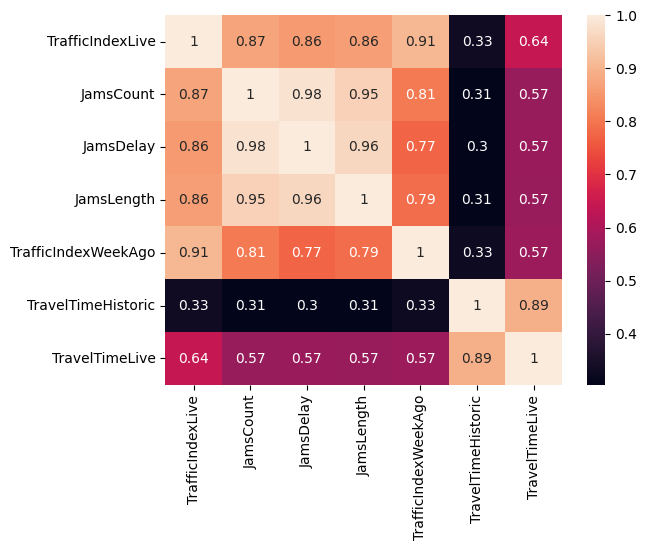

In [23]:
sns.heatmap(df[["TrafficIndexLive",	"JamsCount",	"JamsDelay",	"JamsLength",	"TrafficIndexWeekAgo",	"TravelTimeHistoric",	"TravelTimeLive"]].corr(),annot=True)

In [68]:
k=df.groupby(["City"])["TravelTimeLive"].mean()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Abudhabi'),
  Text(1, 0, 'Al-ain'),
  Text(2, 0, 'Cairo'),
  Text(3, 0, 'Dammam'),
  Text(4, 0, 'Doha'),
  Text(5, 0, 'Dubai'),
  Text(6, 0, 'Jeddah'),
  Text(7, 0, 'Kuwait'),
  Text(8, 0, 'Mecca'),
  Text(9, 0, 'Medina'),
  Text(10, 0, 'Riyadh')])

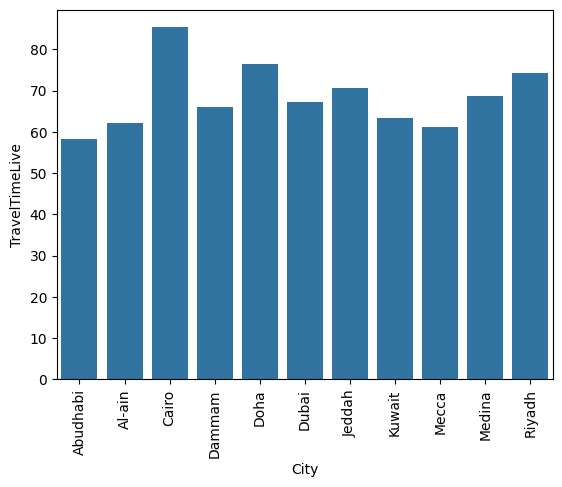

In [74]:
sns.barplot(k)
plt.xticks(rotation=90)
#avrage travel time by city

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


<Axes: >

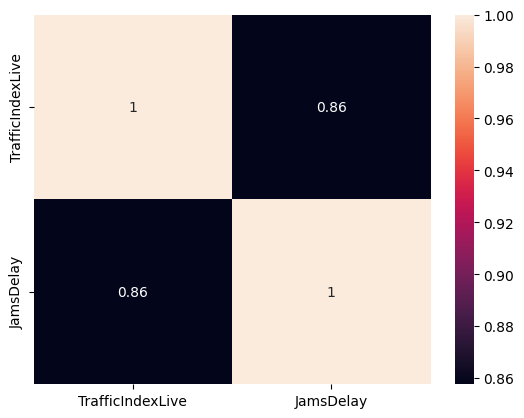

In [44]:
sns.heatmap(df[["TrafficIndexLive","JamsDelay"]].corr(),annot=True)

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

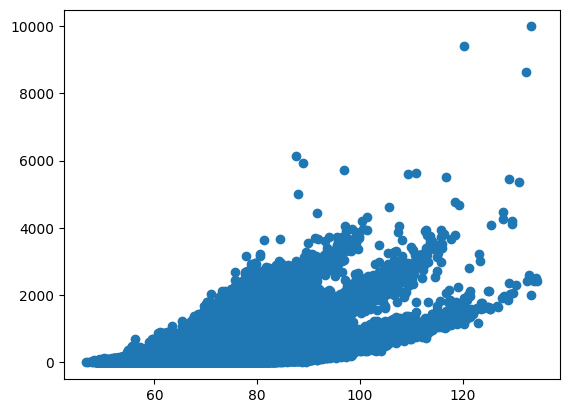

In [45]:
plt.scatter(df["TravelTimeLive"],df["JamsDelay"])

<ipython-input-50-09ef7e9298c2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df["City"].value_counts(),palette='muted')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Doha'),
  Text(1, 0, 'Riyadh'),
  Text(2, 0, 'Cairo'),
  Text(3, 0, 'Dubai'),
  Text(4, 0, 'Kuwait'),
  Text(5, 0, 'Abudhabi'),
  Text(6, 0, 'Al-ain'),
  Text(7, 0, 'Dammam'),
  Text(8, 0, 'Jeddah'),
  Text(9, 0, 'Mecca'),
  Text(10, 0, 'Medina')])

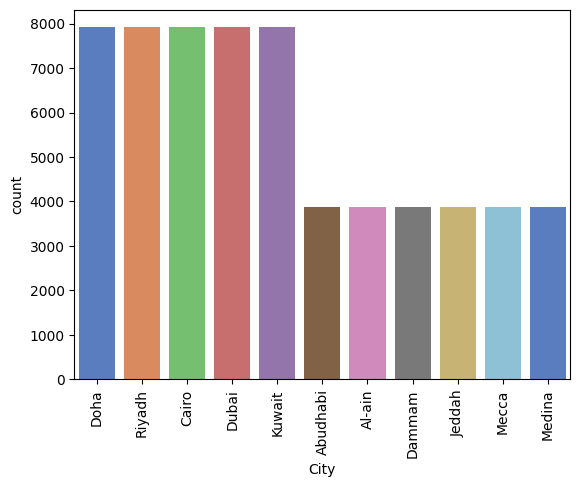

In [50]:
sns.barplot(df["City"].value_counts(),palette='muted')
plt.xticks(rotation=90)


([<matplotlib.patches.Wedge at 0x78f04e294c40>,
 [Text(-0.003784030275941767, 1.099993491396595, 'TrafficIndexLive'),
  Text(0.003783927287118036, -1.0999934917508767, 'TrafficIndexWeekAgo')],
 [Text(-0.0020640165141500547, 0.5999964498526881, '50.1%'),
  Text(0.002063960338428019, -0.5999964500459327, '49.9%')])

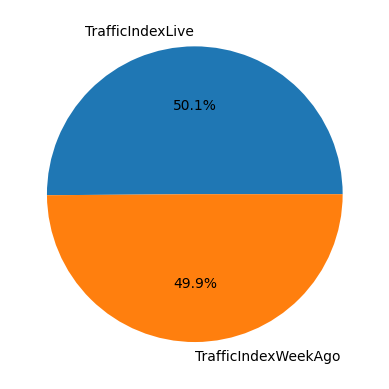

In [41]:
plt.pie(x=[df["TrafficIndexLive"].sum(),df["TrafficIndexWeekAgo"].sum()],labels=["TrafficIndexLive","TrafficIndexWeekAgo"],autopct="%0.1f%%")

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

This data is clean and can be easily used. There were some empty rows, but I dropped them. The data consists mostly of numbers.
 There are a lot of strong relationships between the variables.



